In [ ]:
import pandas as pd

# Sample dataset
data = {'Person': [1, 2, 3],
        'Favorite Car Color': ['Red', 'Blue', 'Green']}
df = pd.DataFrame(data)

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Favorite Car Color'], prefix=['Color'])

# Display the encoded dataset
print(df_encoded)

In [1]:
import pandas as pd

# Load dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Peek at the data
print(df.head())
print(df.info())
print(df.describe())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [2]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [3]:
# Drop columns not useful for prediction
df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

# Fill missing Age with median
df["Age"].fillna(df["Age"].median(), inplace=True)

# Fill missing Embarked with mode (most common port)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

print(df.isnull().sum())  # check for missing data


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


C:\Users\nivya\AppData\Local\Temp\ipykernel_19404\3038571303.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\nivya\AppData\Local\Temp\ipykernel_19404\3038571303.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [28]:
df['Embarked'].unique()

KeyError: 'Embarked'

In [4]:
from sklearn.preprocessing import LabelEncoder

# Encode Sex
df["Sex"] = LabelEncoder().fit_transform(df["Sex"])  # Male=1, Female=0

# One-hot encode Embarked
df = pd.get_dummies(df, columns=["Embarked"])

print(df.head())


   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  \
0         0       3    1  22.0      1      0   7.2500       False       False   
1         1       1    0  38.0      1      0  71.2833        True       False   
2         1       3    0  26.0      0      0   7.9250       False       False   
3         1       1    0  35.0      1      0  53.1000       False       False   
4         0       3    1  35.0      0      0   8.0500       False       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


In [5]:
from sklearn.model_selection import train_test_split

X = df.drop("Survived", axis=1)  # Features
y = df["Survived"]               # Target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(X_train.shape, X_test.shape)


(712, 9) (179, 9)


In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [12]:
X_test[:5]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
565,3,1,24.0,2,0,24.1500,False,False,True
160,3,1,44.0,0,1,16.1000,False,False,True
553,3,1,22.0,0,0,7.2250,True,False,False
860,3,1,41.0,2,0,14.1083,False,False,True
241,3,0,28.0,1,0,15.5000,False,True,False


In [13]:
y_pred[:5]

array([0, 0, 0, 0, 1])

In [11]:
y_test[:5]

565    0
160    0
553    1
860    0
241    1
Name: Survived, dtype: int64

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8044692737430168

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179


Confusion Matrix:
 [[98 12]
 [23 46]]


In [15]:
model = LogisticRegression(max_iter=380)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [16]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8044692737430168

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179


Confusion Matrix:
 [[98 12]
 [23 46]]


In [17]:
# Feature engineering
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df["IsAlone"] = (df["FamilySize"] == 1).astype(int)

# Update features
X = df.drop("Survived", axis=1)
y = df["Survived"]

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy with FamilySize & IsAlone:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy with FamilySize & IsAlone: 0.8044692737430168

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.78      0.68      0.73        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179


Confusion Matrix:
 [[97 13]
 [22 47]]


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models = {
    "Logistic Regression": LogisticRegression(max_iter=400, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=50, random_state=42),
    "SVC": SVC(kernel="rbf", random_state=42)
}

for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.3f}")


Logistic Regression Accuracy: 0.804
Random Forest Accuracy: 0.816
SVC Accuracy: 0.626


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Define models dictionary
models = {
    "Logistic Regression": LogisticRegression(max_iter=400, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=500, random_state=42),
    "SVC": SVC(kernel="rbf", random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(
        n_estimators=500, learning_rate=0.05, max_depth=3, random_state=42
    ),
    "XGBoost": XGBClassifier(
        n_estimators=600, learning_rate=0.05, max_depth=3,
        subsample=0.9, colsample_bytree=0.9,
        reg_lambda=1.0, objective="binary:logistic",
        eval_metric="logloss", random_state=42, n_jobs=-1
    )
}

# Train and evaluate each model
for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.3f}")


Logistic Regression Accuracy: 0.804
Random Forest Accuracy: 0.816
SVC Accuracy: 0.626
Gradient Boosting Accuracy: 0.810
XGBoost Accuracy: 0.777


In [21]:
for n in [5,10, 50, 100, 200, 250, 300, 400, 500]:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    print(f"{n} trees → test accuracy {acc:.3f}")

5 trees → test accuracy 0.793
10 trees → test accuracy 0.816
50 trees → test accuracy 0.816
100 trees → test accuracy 0.810
200 trees → test accuracy 0.821
250 trees → test accuracy 0.821
300 trees → test accuracy 0.832
400 trees → test accuracy 0.821
500 trees → test accuracy 0.816


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import randint

# Base model
rf = RandomForestClassifier(random_state=42)

# Parameter search space (around typical defaults)
param_dist = {
    "n_estimators": randint(100, 600),   # number of trees (around 500)
    "max_depth": randint(3, 15),         # tree depth range
}

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Randomized search
search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,               # number of random combinations to test
    scoring="accuracy",
    n_jobs=-1,
    cv=cv,
    verbose=1,
    random_state=42
)

# Fit search
search.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters:", search.best_params_)
print("Best CV Accuracy:", f"{search.best_score_:.4f}")

# Evaluate on the test data
best_rf = search.best_estimator_
y_pred = best_rf.predict(X_test)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'max_depth': 3, 'n_estimators': 574}
Best CV Accuracy: 0.8216

Test Accuracy: 0.7932960893854749

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.94      0.85       110
           1       0.85      0.57      0.68        69

    accuracy                           0.79       179
   macro avg       0.81      0.75      0.76       179
weighted avg       0.80      0.79      0.78       179


Confusion Matrix:
 [[103   7]
 [ 30  39]]


In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import randint, loguniform

# Base model
gb = GradientBoostingClassifier(random_state=42)

# Parameter search space (around your chosen defaults)
param_dist = {
    "n_estimators": randint(300, 800),          # test values around 500
    "learning_rate": loguniform(1e-3, 0.3),     # test 0.001 to 0.3
    "max_depth": randint(2, 6),                 # test 2–5 depth range
}

# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Randomized search
search = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_dist,
    n_iter=30,               # number of random combinations to test
    scoring="accuracy",      # metric to optimize
    n_jobs=-1,               # use all CPU cores
    cv=cv,
    verbose=1,
    random_state=42
)

# Fit search
search.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters:", search.best_params_)
print("Best CV Accuracy:", f"{search.best_score_:.4f}")

# Evaluate on test data
best_gb = search.best_estimator_
y_pred = best_gb.predict(X_test)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'learning_rate': np.float64(0.032781876533976156), 'max_depth': 3, 'n_estimators': 775}
Best CV Accuracy: 0.8259

Test Accuracy: 0.8044692737430168

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179


Confusion Matrix:
 [[98 12]
 [23 46]]


# MNIST

Shape of X: (70000, 784)
Shape of y: (70000,)


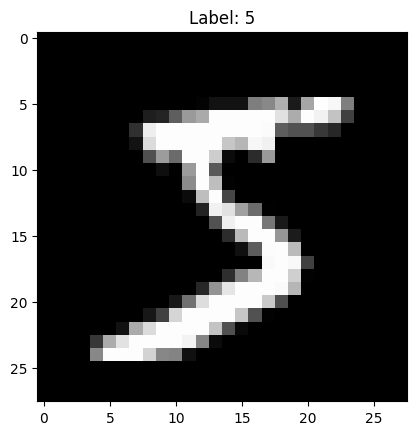

In [24]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

# Load MNIST from OpenML
mnist = fetch_openml('mnist_784', version=1)

X, y = mnist.data, mnist.target.astype(int)  # X: pixel values, y: digit labels

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Show a sample digit
plt.imshow(X.iloc[0].to_numpy().reshape(28,28), cmap="gray")
plt.title(f"Label: {y.iloc[0]}")
plt.show()


In [25]:
X.iloc[0].to_numpy().reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Scale pixel values
X_scaled = X / 255.0

# Train/test split (10k test images)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=10000, random_state=42, stratify=y
)

print(X_train.shape, X_test.shape)


(60000, 784) (10000, 784)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression(max_iter=400)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
print("Logistic Regression accuracy:", accuracy_score(y_test, y_pred))


Logistic Regression accuracy: 0.923


In [ ]:

print(X_test.shape)
print(X_test.iloc[10].shape)
